# Polynomial Regression

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Import Dataset

In [2]:
dataset = pd.read_csv("./datasets/train.csv")
X = dataset.iloc[:, 0].values.reshape(-1, 1)
y = dataset.iloc[:, 1].values

In [3]:
X = np.array([min(n, 200) for n in X]).reshape(-1, 1)

## Split Dataset

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Polynomial Regression

In [5]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=7)
X_poly = poly_reg.fit_transform(X_train)

## Create Linear Regression Model

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

LinearRegression()

## Visualize Model

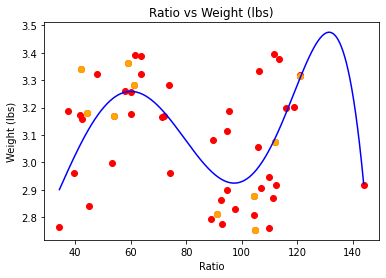

In [7]:
# create grid
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

# plot the training set
plt.scatter(X, y, color="red")
plt.scatter(X_test, y_test, color="orange")
plt.plot(X_grid, lin_reg.predict(poly_reg.transform(X_grid)), color="blue")

# add axis labels
plt.title("Ratio vs Weight (lbs)")
plt.xlabel("Ratio")
plt.ylabel("Weight (lbs)")

# show the plot
plt.show()

## Metrics

In [9]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = lin_reg.predict(poly_reg.transform(X_test))
print(f"r2_score: {r2_score(y_test, y_pred)}")
print(f"mean_squared_error: {mean_squared_error(y_test, y_pred)}")

r2_score: 0.645660845695212
mean_squared_error: 0.01657603125594679
